# Problem Statement
Create a neural network that predicts if a person will have heart disease or not. Dataset is from heart disease dataset of UCL data repository. Download it [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Heart%29).

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# After download 'heart.dat' file, add it into your Google Drive
# Prepare data from UCL repository

import csv
import pandas as pd

headers = [ 'age', 'sex','chest_pain','resting_blood_pressure',  
            'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
            'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
            'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('/content/gdrive/MyDrive/heart.dat', sep=' ', names=headers)
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


Let's look at the data shape.

In [ ]:
heart_df.shape

(270, 14)

(270, 14) means that there're 270 observations (or 270 rows) with 13 features and 1 target variable `heart_disease`. The features presented in this data are

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholesterol in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* heart_disease: absence (1) or presence (2) of heart disease

Next, let's see if there's any missing data in `heart_df`.



In [ ]:
heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

Alright, no missing values. What about features type? Are they all numeric?

In [ ]:
heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

Nice, they're all numeric.

---


Next, separate the target from the data, split into train and test set, and then standardize the data.

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get input from heart_df
X = heart_df.drop(columns=['heart_disease'])

# Replace target variable with 0 and 1
# 0 means "no heart disease", 1 means "have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=2)

# Standardize the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Check the results
print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test labels is {y_test.shape}")

Shape of train set is (216, 13)
Shape of test set is (54, 13)
Shape of train label is (216, 1)
Shape of test labels is (54, 1)


# Building the Neural Network

Now that we have train and test dataset, let’s start building the neural network to make predictions. To do that, we need to understand the concept of **layers**.

The layer is a collection of nodes at different stages of computation in a neural network. Each node acts as a neuron and performs calculations on the data passed to it. Look at the illustration of a 3-layer neural network below:

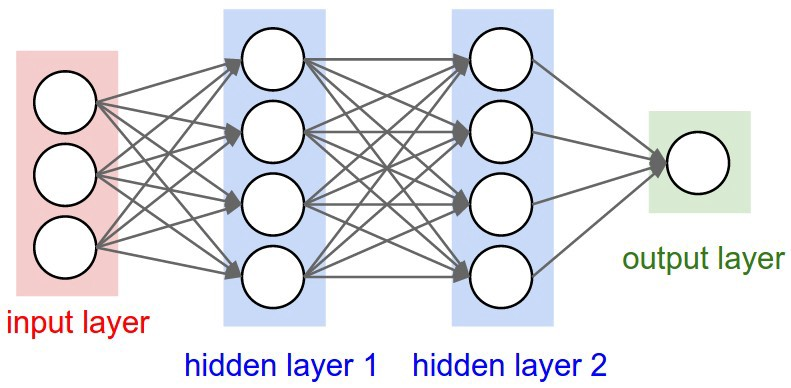

I know you can see 4 layers in the image above, but we don't normally count the input layer. The number of nodes in input layer will depend on the number of features present in your dataset. In our case, it will be **13 nodes because we have 13 features**.

The final layer of the neural network is called the output layer, and the number of nodes depends on what you’re trying to predict. For regression and binary classification tasks, you can use a single node; while for multi-class problems, you’ll use multiple nodes, depending on the number of classes.

Because this is a binary classification problem, you will have a **single node in output layer**.

The layers between input and output layer is where the magic happen -- hidden layers. These layers can be as wide and deep as much as you want, and while a deeper network is better, the computational time also increases as you go deeper.

For this problem, I'll construct 2-layer neural network. Below is the preview **(it's really hard to draw this image, appreciate it!!!)**

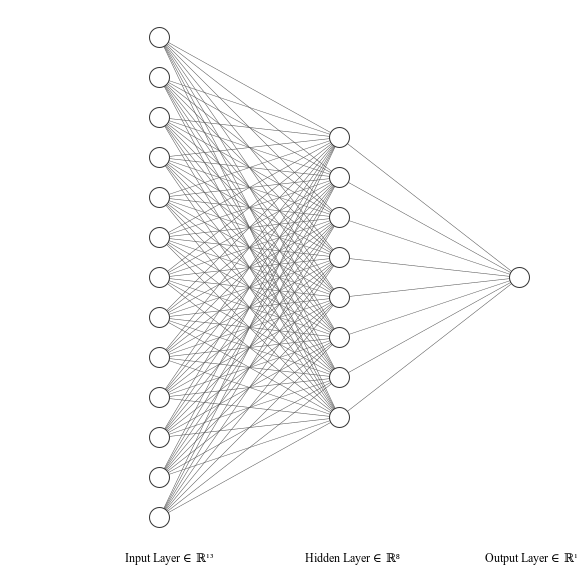

The netwotk above has 1 hidden layer and a final output layer with a single node. The input layer will have 13 nodes because there're 13 features. The hidden layer can have any number of nodes. For this example, there'll be 8 nodes for hidden layer. Final output layer will have a single node because this is binary classifcation problem.

# Let's start building

In the code block below, I’ll create a neural network class and initialize those weights and biases:

In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {} # dict to store weight and bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)

First, create NeuralNet class. Then, during initialization, some variables are created to hold calculation. The argument `layers` is a list to stores network’s architecture. `[13, 8, 1]` means it accepts 13 input features, 8 nodes in the hidden layer, and a single node for output layer.

Function **(init_weights)** is to initialize the weights and biases as random numbers. These weights are initialized from a uniform random distribution and saved to a dict called `params`.

You might notice that there are two weight and bias arrays. **W1** and **b1** are weight and bias of first layer. Dimension of **W1** will be 13 by 8 -- because there are 13 input features and 8 hidden nodes, while **b1** will be a vector of size 8 because there're 8 hidden nodes.

The second weight array **W2** will be a 10 by 1-dimensional array because you have 10 hidden nodes and 1 output node, and finally, the second bias **b2** will be a vector of size 1 because you have just 1 output.

You might start to see a pattern here. So what will the dimensions be for a neural network with this architecture `[20, 23, 2]`?

# The Activation Function

Activation functions are the nonlinear computations done in each node of a Neural Network. There're 2 phases of calculation happen in a node.

First, do a weighted sum of the input and the weights, add the biases, and then pass the result through an activation function.

An activation function is what makes a neural network capable of learning complex non-linear functions. Non-linear functions are difficult for traditional machine learning algorithms like logistic and linear regression to learn. The activation function is what makes a neural network capable of understanding these functions.

There're many types of activation function. Below is some example.

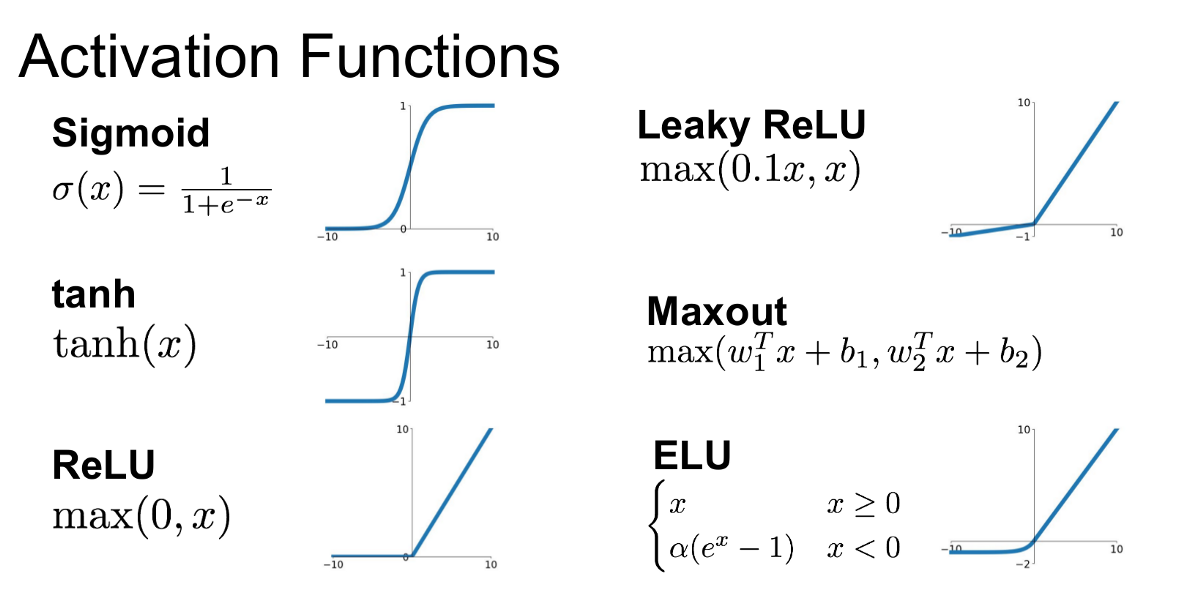

The activation function is computed by each node in the hidden layers of a neural network. For this project, ReLU will be used because it's proven to perform well.

But... what is ReLU?

ReLU (Rectified Linear Unit) is a simple function that compares a value with zero. That is, it will return the value passed to it if it is greater than zero; otherwise, it returns zero.

In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
def relu(self, Z):
  '''
  The ReLu activation function is to performs a threshold
  operation to each input element where values less 
  than zero are set to zero.
  '''
  return np.maximum(0, Z)

Add this function to `NeuralNet` class. Note that `np.maximum` performs an array-wise ReLU because you’ll be dealing mainly with arrays, not single values.

In summary;

*   Input Layer >> Hidden Layer >> calculates a weighted sum, adds the bias term >> ReLU >> Output Layer

For output layer, it will depend on what we’re trying to predict. Sigmoid function works well on binary classification problem. We can use SoftMax for multi-class problems.

For this problem, Sigmoid should be sufficient enough.

In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
def sigmoid(self, Z):
  '''
  The sigmoid function takes in real numbers in any range and 
  squashes it to a real-valued output between 0 and 1.
  '''
  return 1/(1+np.exp(-Z))

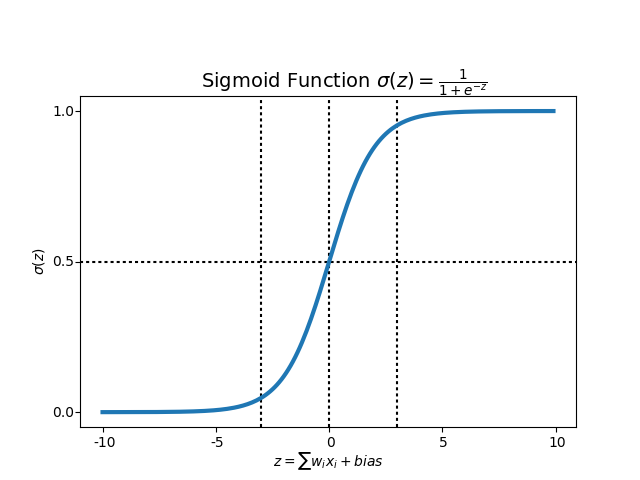

# Loss Function

What is loss function? Loss function is a way of measuring how good a model’s prediction is so that it can adjust the weights and biases.

Loss function has to be properly designed so that it can correctly penalize a model that is wrong and reward a model that is right. The choice of loss function depends on the task -- and for classification, cross-entropy is good enough.

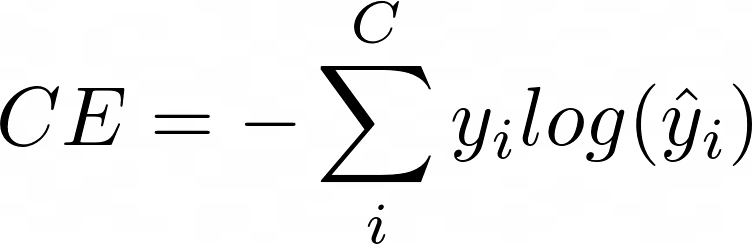

C is the number of classes, y is the true value and y_hat is the predicted value.

For a binary classification task (i.e. C=2), the cross-entropy loss function becomes:

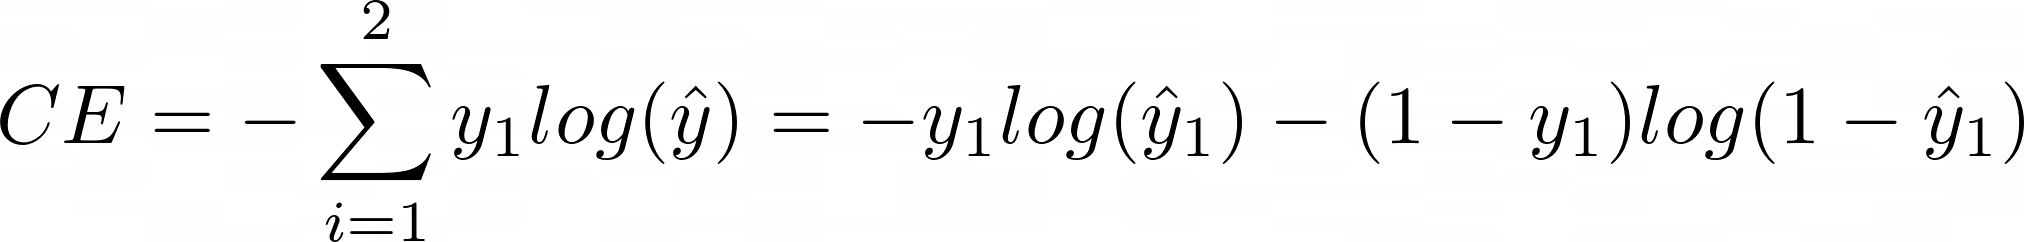

Let's see how we can translate this into code. Be aware, there's ***log*** in the loss function. We will have to take account of avoiding feeding 0 into ***log***.

In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
def eta(self, x):
  '''
  we compare the value, and if it is zero, 
  we replace with an extremely small value (0.00000001)
  '''
  ETA = 0.0000001
  return np.maximum(x, ETA)

def entropy_loss(self, y, y_hat):
  n_sample = len(y)
  y_inv = 1 - y
  yhat_inv = 1 - y_hat

  y_hat = self.eta(y_hat)
  yhat_inv = self.eta(yhat_inv)

  loss = -1/n_sample * (np.sum(np.multiply(np.log(y_hat), y) + np.multiply((y_inv), np.log(yhat_inv))))
  return loss

Notice the sum and the division by sample size in the code block above? This means you’re considering the average loss with respect to all the inputs. That is, you’re concerned about the combined loss from all the samples and not the individual losses.

# Forward Propagation

Forward propagation is the name given to the series of computations performed by the neural network before a prediction is made. In a 2-layer network, we'll perform following actions;


1. Compute the weighted sum between the input and the first layer's weights and then add the bias: **Z1 = (W1 * X) + b**
2. Pass the result through the ReLU activation function: **A1 = Relu(Z1)**
3. Compute the weighted sum between the output (A1) of the previous step and the second layer's weights—also add the bias: **Z2 = (W2 * A1) + b2**
4. Compute the output function by passing the result through a sigmoid function: **A2 = sigmoid(Z2)**
5. Finally, compute the loss between the predicted output and the true labels: **loss(A2, Y)**

For a 3-layer network, you will have to perform additional **Z3** and **A2** using **W3** and **b3** before the output layer.

Let's put all of this into code;



In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
def forward_propagation(self):
  '''
  Performs the forward propagation
  '''

  Z1 = self.X.dot(self.params['W1']) + self.params['b1']
  A1 = relu(Z1)
  Z2 = A1.dot(self.params['W2']) + self.params['b2']

  y_hat = sigmoid(Z2)
  loss = entropy_loss(self.y, y_hat)

  # Save calculated parameters
  self.params['Z1'] = Z1
  self.params['Z2'] = Z2
  self.params['A1'] = A1

  # y_hat and loss will be used later during Backward Propagation
  return y_hat, loss

Now you've reach the half way point of building your own Neural Network. Good Job!!!

Here's the fun part...

# Backward Propagation

Backward propagation is the name given to the process of training a neural network by updating its weights and bias.

Neural network learns to predict the correct values by continuously trying different values for the weights and then comparing the losses. If the losses decrease, then the current weight is better than the previous, and vice-versa.

Neural network will go through many training (Forward Propagation) and update (Backward Propagation) cycles to get the best weights and biases. The process of searching for the right weights is called optimization.

How do you code a neural network to correctly adjust its weights with respect to the loss it calculates? Well, thanks to mathematics, we can use calculus to do this effectively.

## Using calculus in Backward Propagation

After calculating `y_hat` and `loss` from Forward Propagation phase, now you will calculate the derivatives backward, from the loss all the way up to the first weight and bias.

** All of these equations take a lot of TIMESSS!!!!!

Start with the last layer, calculate the derivative of the loss with respect to the output y_hat as:

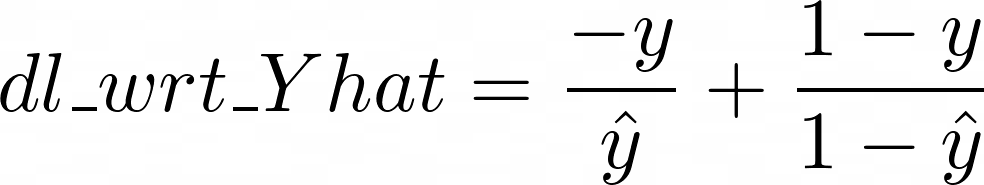

How did you get to the loss? You calculated the **sigmoid(Z2)**, right.

Now, what is the derivative of the loss with respect to the **sigmoid(Z2)**?

**Sigmoid(Z2)** is a combination of two functions (Sigmoid and Z2), so you have to calculate two derivatives:

First, calculate the derivative of sigmoid activation with respect to (wrt) the loss:

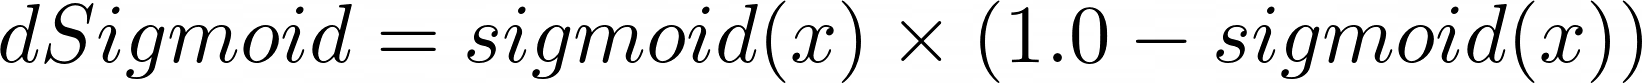

**Note:** On how to find derivative of Sigmoid, there're many tutorials on the internet.

Then, you calculate the derivative of the loss wrt Z2:

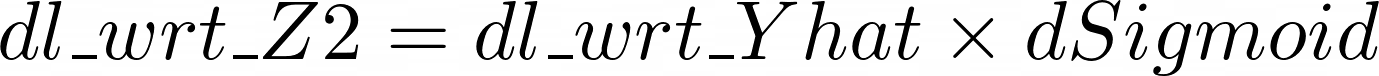

Now, how did you get Z2? You calculated a dot product between A1 and W2, and added a bias b2. 

This means that you have to calculate the loss with respect to all these variables:

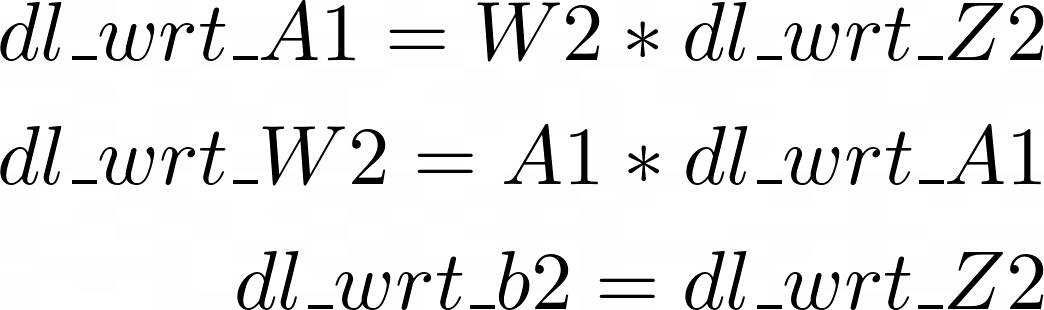

And how did you get to **A1**? You performed **ReLU(Z1)**. 

So you take the derivative of **ReLU** and **Z1** wrt to the loss as well. The derivative of ReLU is 1 if the input is greater than 1, and 0 otherwise. We will create `drelu` function for that.

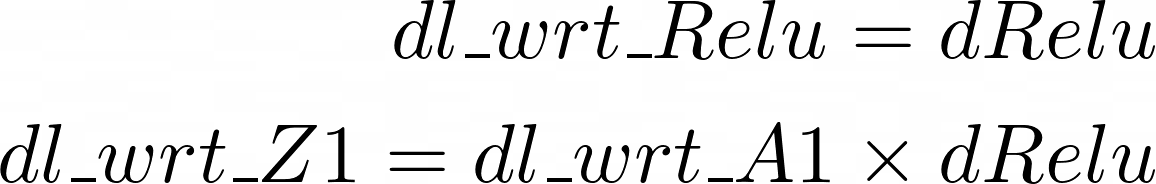

Next, how did you get Z1? You computed the dot product between X and W1 and added the bias b1. 

So you compute the derivative of all the variables involved, except the input X because we won't update the input.

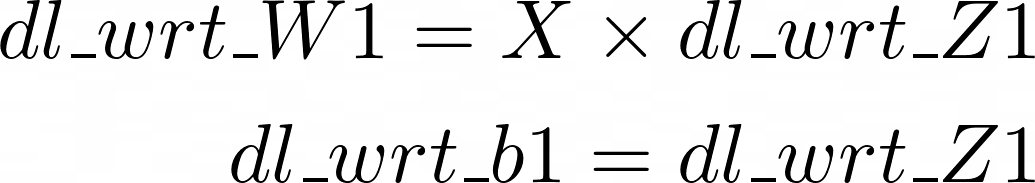

In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
def back_propagation(self,y_hat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - y_hat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(y_hat))
        dl_wrt_sig = y_hat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

# Optimization and Training of the Neural Network

In the previous section, we used calculus to compute the derivatives of the weights and biases with respect to the loss. The model now knows how to change them. 

To automatically use this information to update the weights and biases, a neural network must perform hundreds, thousands, and even millions of forward and backward propagations. That is, in the training phase, the neural network must perform the following:

1. Forward propagation
2. Backward Propagation
3. Weight updates with calculated gradients
4. Repeat

Now that we have the lines of code to perform the updates, we’ll create a new function called `fit` that takes the input (X) and labels (Y) and calls the forward and backpropagation repeatedly for a specified number of iterations:



In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
def fit(self, X, y):
      '''
      Trains the neural network using the specified data and labels
      '''
      self.X = X
      self.y = y
      self.init_weights() #initialize weights and bias

      for i in range(self.iterations):
          y_hat, loss = self.forward_propagation()
          self.back_propagation(y_hat)
          self.loss.append(loss)

# Predictions

To make predictions, we simply make a forward pass on the test data. That is, we use the saved weights and biases from the training phase.

Let's create a function called `predict` for that:

In [ ]:
# DO NOT run this block, it's here for explantion (for me) only.
def predict(self, X):
  '''
  Predicts on a test data
  '''
  Z1 = X.dot(self.params['W1']) + self.params['b1']
  A1 = relu(Z1)
  Z2 = A1.dot(self.params['W2']) + self.params['b2']
  pred = self.sigmoid(Z2)

  return np.round(pred)

# Putting it all together

Let’s put all our code together:

In [ ]:
# RUN this block.
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {} # dict to store weight and bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
    
    def relu(self, Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0, Z)
    
    def dRelu(self, x):

        x[x<=0] = 0
        x[x>0] = 1

        return x
    
    def sigmoid(self, Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1/(1+np.exp(-Z))
    
    def eta(self, x):
        '''
        we compare the value, and if it is zero, 
        we replace with an extremely small value (0.00000001)
        '''
        ETA = 0.0000001
        return np.maximum(x, ETA)

    def entropy_loss(self, y, y_hat):
        n_sample = len(y)
        y_inv = 1 - y
        yhat_inv = 1 - y_hat

        y_hat = self.eta(y_hat)
        yhat_inv = self.eta(yhat_inv)

        loss = -1/n_sample * (np.sum(np.multiply(np.log(y_hat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''

        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']

        y_hat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y, y_hat)

        # Save calculated parameters
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        # y_hat and loss will be used later during Backward Propagation
        return y_hat, loss
    
    def back_propagation(self,y_hat):
        '''
        Computes the derivatives and update weights and bias accordingly.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - y_hat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(y_hat))
        dl_wrt_sig = y_hat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
    
    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias

        for i in range(self.iterations):
            y_hat, loss = self.forward_propagation()
            self.back_propagation(y_hat)
            self.loss.append(loss)
    
    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)

        return np.round(pred)
    
    def acc(self, y, y_hat):
        '''
        Calculates the accuracy between the predicted value and the truth labels
        '''
        acc = int(sum(y == y_hat) / len(y) * 100)

        return acc
    
    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

# Let's Test it

In [ ]:
nn = NeuralNet() # create the NN model
nn.fit(X_train, y_train) # train the model

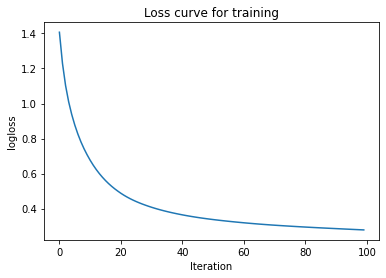

In [ ]:
nn.plot_loss()

In [ ]:
train_pred = nn.predict(X_train)
test_pred = nn.predict(X_test)

print("Train accuracy is {}".format(nn.acc(y_train, train_pred)))
print("Test accuracy is {}".format(nn.acc(y_test, test_pred)))

Train accuracy is 87
Test accuracy is 75


# Let's compare with Tensorflow Keras

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(13,)),
            tf.keras.layers.Dense(units=8, activation='relu'),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['binary_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
7/7 - 1s - loss: 0.9752 - binary_accuracy: 0.3657
Epoch 2/100
7/7 - 0s - loss: 0.9377 - binary_accuracy: 0.3843
Epoch 3/100
7/7 - 0s - loss: 0.9011 - binary_accuracy: 0.4167
Epoch 4/100
7/7 - 0s - loss: 0.8688 - binary_accuracy: 0.4352
Epoch 5/100
7/7 - 0s - loss: 0.8396 - binary_accuracy: 0.4722
Epoch 6/100
7/7 - 0s - loss: 0.8117 - binary_accuracy: 0.4769
Epoch 7/100
7/7 - 0s - loss: 0.7867 - binary_accuracy: 0.4907
Epoch 8/100
7/7 - 0s - loss: 0.7634 - binary_accuracy: 0.5370
Epoch 9/100
7/7 - 0s - loss: 0.7427 - binary_accuracy: 0.5509
Epoch 10/100
7/7 - 0s - loss: 0.7223 - binary_accuracy: 0.5556
Epoch 11/100
7/7 - 0s - loss: 0.7049 - binary_accuracy: 0.5926
Epoch 12/100
7/7 - 0s - loss: 0.6880 - binary_accuracy: 0.6157
Epoch 13/100
7/7 - 0s - loss: 0.6727 - binary_accuracy: 0.6250
Epoch 14/100
7/7 - 0s - loss: 0.6584 - binary_accuracy: 0.6296
Epoch 15/100
7/7 - 0s - loss: 0.6444 - binary_accuracy: 0.6481
Epoch 16/100
7/7 - 0s - loss: 0.6316 - binary_accuracy: 0.6574
E

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)

print('\nTrain loss:', train_loss)
print('\nTrain accuracy:', train_acc)

7/7 - 0s - loss: 0.2999 - binary_accuracy: 0.8843

Train loss: 0.29990020394325256

Train accuracy: 0.8842592835426331


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\ntest loss:', test_loss)
print('\ntest accuracy:', test_acc)

2/2 - 0s - loss: 0.5478 - binary_accuracy: 0.7593

test loss: 0.5477703809738159

test accuracy: 0.7592592835426331
